In [2]:
import numpy as np
from skimage.measure import label
import os
import numpy as np
from skimage.io import imread
from skimage.measure import label

def calculate_iou(pred_binary, gt_binary):
    """
    Compute IoU for two binary masks.
    
    Parameters:
    -----------
    pred_binary (numpy array): Binary mask for predicted object.
    gt_binary (numpy array): Binary mask for ground truth object.
    
    Returns:
    --------
    float: IoU value.
    """

    intersection = np.logical_and(pred_binary, gt_binary).sum()
    union = np.logical_or(pred_binary, gt_binary).sum()
    return intersection / union if union > 0 else 0



def calculate_mean_iou(predicted_mask, ground_truth_mask):
    """
    Calculate Mean IoU (mIoU) for binary masks with multiple objects.

    Parameters:
    -----------
    predicted_mask (numpy array): Binary mask from the model.
    ground_truth_mask (numpy array): Binary ground truth mask.

    Returns:
    --------
    float: Mean IoU value.
    list: IoU values for each ground truth object.
    """

    pred_labels = label(predicted_mask)
    gt_labels = label(ground_truth_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])
    
    iou_values = []

    for gt_label in gt_objects:
        gt_binary = gt_labels == gt_label
        best_iou = 0
        
        for pred_label in pred_objects:
            pred_binary = pred_labels == pred_label
            iou = calculate_iou(pred_binary, gt_binary)
            best_iou = max(best_iou, iou)
        
        iou_values.append(best_iou)
    
    mean_iou = np.mean(iou_values) if iou_values else 0
    return mean_iou, iou_values


def calculate_dice(pred_binary, gt_binary):
    """ 
    Compute dice coefficient for two binary masks.
    
    Parameters:
    -----------
    pred_binary (numpy array): Binary mask for predicted panel.
    gt_binary (numpy array): Binary mask for ground truth panel.
    
    Returns:
    --------
    float: Dice coef value.
    """

    intersection = np.logical_and(pred_binary, gt_binary).sum()
    sum_cardinality = pred_binary.sum() + gt_binary.sum()
    return 2*intersection / sum_cardinality if sum_cardinality > 0 else 0



def calculate_mean_dice(predicted_mask, gt_mask):
    """ 
    Calculate mean dice coefficient panel-wise

    Parameters:
    -----------
    predicted_mask (numpy array): Binary mask from the model.
    gt_mask (numpy array): Binary ground truth mask.

    Returns:
    --------
    float: Mean dice coef value.
    """

    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])
    
    dice_values = []

    for gt_label in gt_objects:
        gt_binary = gt_labels == gt_label
        best_dice = 0
        
        for pred_label in pred_objects:
            pred_binary = pred_labels == pred_label
            dice = calculate_dice(pred_binary, gt_binary)
            best_dice = max(best_dice, dice)
        
        dice_values.append(best_dice)
    
    mean_dice = np.mean(dice_values) if dice_values else 0
    return mean_dice, dice_values

In [3]:
def process_folders(true_mask_folder, predicted_mask_folder):

    true_mask_files = sorted(os.listdir(true_mask_folder))

    mean_ious = []
    mean_dices = []

    for true_file in true_mask_files:
        identifier = true_file.replace("true_mask_", "").replace(".png", "")

        pred_file = f"pred_mask_raw_{identifier}.png"

        pred_file_path = os.path.join(predicted_mask_folder, pred_file)
        if not os.path.exists(pred_file_path):
            print(f"Warning: Predicted mask {pred_file} not found for true mask {true_file}. Skipping.")
            continue

        true_mask = imread(os.path.join(true_mask_folder, true_file))
        predicted_mask = imread(pred_file_path)

        mean_iou, _ = calculate_mean_iou(predicted_mask, true_mask)
        mean_dice, _ = calculate_mean_dice(predicted_mask, true_mask)

        mean_ious.append(mean_iou)
        mean_dices.append(mean_dice)

        print(f"{true_file}: Mean IoU = {mean_iou:.4f}, Mean Dice = {mean_dice:.4f}")

    overall_mean_iou = np.mean(mean_ious) if mean_ious else 0
    overall_mean_dice = np.mean(mean_dices) if mean_dices else 0

    print(f"\nOverall Results (averaged over {len(mean_ious)} samples): \n")
    print(f"Overall Mean IoU: {overall_mean_iou}\n")
    print(f"Overall Mean Dice: {overall_mean_dice}\n")

    return overall_mean_iou, overall_mean_dice

In [4]:
true_mask_folder = r"best_model_3_pred\true_mask"
predicted_mask_folder = r"best_model_3_pred\post_process_vaga"

process_folders(true_mask_folder, predicted_mask_folder)
# print("and this is mixed raw 100 test")

true_mask_1.png: Mean IoU = 0.9915, Mean Dice = 0.9957
true_mask_10.png: Mean IoU = 0.8221, Mean Dice = 0.8785
true_mask_11.png: Mean IoU = 0.9924, Mean Dice = 0.9962
true_mask_12.png: Mean IoU = 0.9812, Mean Dice = 0.9905
true_mask_13.png: Mean IoU = 0.9806, Mean Dice = 0.9901
true_mask_14.png: Mean IoU = 0.9946, Mean Dice = 0.9973
true_mask_15.png: Mean IoU = 0.9673, Mean Dice = 0.9832
true_mask_16.png: Mean IoU = 0.9867, Mean Dice = 0.9933
true_mask_17.png: Mean IoU = 0.9879, Mean Dice = 0.9939
true_mask_18.png: Mean IoU = 0.9845, Mean Dice = 0.9922
true_mask_2.png: Mean IoU = 0.9930, Mean Dice = 0.9965
true_mask_20.png: Mean IoU = 0.9712, Mean Dice = 0.9853
true_mask_21.png: Mean IoU = 0.9876, Mean Dice = 0.9937
true_mask_23.png: Mean IoU = 0.9986, Mean Dice = 0.9993
true_mask_26.png: Mean IoU = 0.9784, Mean Dice = 0.9891
true_mask_27.png: Mean IoU = 0.9702, Mean Dice = 0.9848
true_mask_28.png: Mean IoU = 0.9875, Mean Dice = 0.9937
true_mask_3.png: Mean IoU = 0.9917, Mean Dice = 0.

(0.952439193958257, 0.9688253278514436)

## Accu

In [151]:
import numpy as np
from skimage.io import imread
from skimage.measure import label
import numpy as np

def calculate_accuracy(predicted_mask, gt_mask, threshold=None):
    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])
    
    print(f"Number of predicted panels: {len(pred_objects)}")
    print(f"Number of true panels: {len(gt_objects)}")
    
    correct_predictions = 0
    
    for gt_label in gt_objects:
        gt_binary = gt_labels == gt_label
        best_dice = 0
        
        for pred_label in pred_objects:
            pred_binary = pred_labels == pred_label
            dice = calculate_dice(pred_binary, gt_binary)
            best_dice = max(best_dice, dice)
        
        if best_dice >= threshold:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(gt_objects) if len(gt_objects) > 0 else 0
    return accuracy

predicted_mask = imread(r'best_model_aug2_mixed_resunet_aug_pred\pred_mask_raw\pred_mask_raw_26.png') 
gt_mask = imread(r'best_model_aug2_mixed_resunet_aug_pred\true_mask\true_mask_26.png') 

accuracy = calculate_accuracy(predicted_mask, gt_mask, threshold=0.9)
print(f'Accuracy: {accuracy}')


Number of predicted panels: 10
Number of true panels: 8
Accuracy: 1.0


In [152]:
import matplotlib.pyplot as plt
def visualize_labels(predicted_mask, gt_mask):
    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(pred_labels, cmap='magma')
    axes[0].set_title("Predicted Mask", fontsize = 16)
    axes[0].axis('off')
    #tab20b
    axes[1].imshow(gt_labels, cmap='magma')
    axes[1].set_title("Ground Truth Mask", fontsize = 16)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

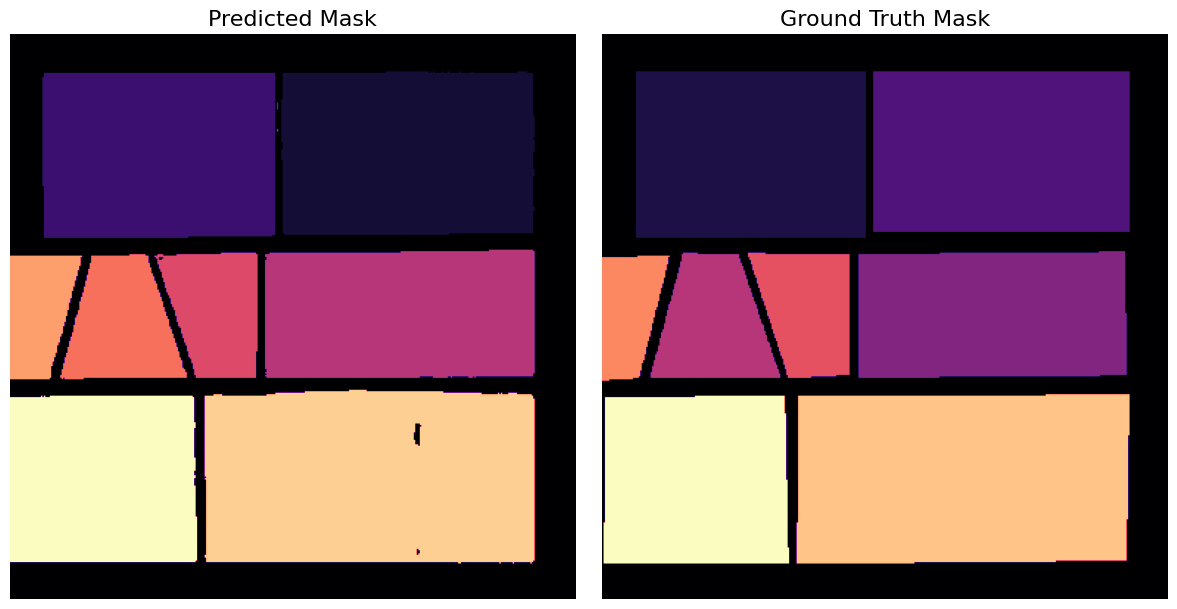

In [153]:
visualize_labels(predicted_mask, gt_mask)

In [5]:
def calculate_accuracy(predicted_mask, gt_mask, threshold=None):
    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])
    
    correct_predictions = 0
    
    for gt_label in gt_objects:
        gt_binary = gt_labels == gt_label
        best_dice = 0
        
        for pred_label in pred_objects:
            pred_binary = pred_labels == pred_label
            dice = calculate_dice(pred_binary, gt_binary)
            best_dice = max(best_dice, dice)
        
        if best_dice >= threshold:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(gt_objects) if len(gt_objects) > 0 else 0
    return accuracy

def iterate_masks(true_mask_folder, pred_mask_folder, threshold=None):    
    true_mask_files = sorted([f for f in os.listdir(true_mask_folder) if f.startswith("true_mask_") and f.endswith(".png")])
    pred_mask_files = sorted([f for f in os.listdir(pred_mask_folder) if f.startswith("pred_mask_raw_") and f.endswith(".png")])

    total_pages = 0
    correct_pages = 0
    total_panel_accuracies = []

    for true_file in true_mask_files:
        true_file_number = true_file.split('_')[-1].replace('.png', '')
        
        for pred_file in pred_mask_files:
            pred_file_number = pred_file.split('_')[-1].replace('.png', '')
            
            if true_file_number == pred_file_number:
                true_mask_path = os.path.join(true_mask_folder, true_file)
                pred_mask_path = os.path.join(pred_mask_folder, pred_file)
                
                true_mask = imread(true_mask_path) > 0.5
                pred_mask = imread(pred_mask_path) > 0.5
                
                accuracy = calculate_accuracy(pred_mask, true_mask, threshold=threshold)
                print(f"Accuracy for {true_file} and {pred_file}: {accuracy}")
                
                total_panel_accuracies.append(accuracy)

                if accuracy == 1:
                    correct_pages += 1
                total_pages += 1
                break 
    
    print(f'Number of panels: {total_panel_accuracies}')
    print(f'Number of pages: {total_pages}')
    panel_accuracy = np.mean(total_panel_accuracies) if total_panel_accuracies else 0
    page_accuracy = correct_pages / total_pages if total_pages > 0 else 0

    print(f"Panel Accuracy (Average): {panel_accuracy}\n")
    print(f"Page Accuracy: {page_accuracy}")
    print('---')


true_mask_folder = r"best_model_3_pred\true_mask"
pred_mask_folder = r"best_model_3_pred\post_process_vaga"
iterate_masks(true_mask_folder, pred_mask_folder, threshold=0.9)

Accuracy for true_mask_1.png and pred_mask_raw_1.png: 1.0
Accuracy for true_mask_10.png and pred_mask_raw_10.png: 0.6666666666666666
Accuracy for true_mask_11.png and pred_mask_raw_11.png: 1.0
Accuracy for true_mask_12.png and pred_mask_raw_12.png: 1.0
Accuracy for true_mask_13.png and pred_mask_raw_13.png: 1.0
Accuracy for true_mask_14.png and pred_mask_raw_14.png: 1.0
Accuracy for true_mask_15.png and pred_mask_raw_15.png: 1.0
Accuracy for true_mask_16.png and pred_mask_raw_16.png: 1.0
Accuracy for true_mask_17.png and pred_mask_raw_17.png: 1.0
Accuracy for true_mask_18.png and pred_mask_raw_18.png: 1.0
Accuracy for true_mask_2.png and pred_mask_raw_2.png: 1.0
Accuracy for true_mask_20.png and pred_mask_raw_20.png: 1.0
Accuracy for true_mask_21.png and pred_mask_raw_21.png: 1.0
Accuracy for true_mask_23.png and pred_mask_raw_23.png: 1.0
Accuracy for true_mask_26.png and pred_mask_raw_26.png: 1.0
Accuracy for true_mask_27.png and pred_mask_raw_27.png: 1.0
Accuracy for true_mask_28.png

Vaga: 

Panel Accuracy (Average): 0.9477828168304357

Page Accuracy: 0.8571428571428571

---

In [6]:
def calculate_metrics_with_threshold(predicted_mask, gt_mask, threshold=0.9):
    """
    Calculate precision, recall, and F1-score for panel extraction using Dice coefficient threshold.

    Parameters:
    -----------
    predicted_mask (numpy array): Binary mask from the model.
    gt_mask (numpy array): Binary ground truth mask.
    threshold (float): Dice coefficient threshold for matching panels.

    Returns:
    --------
    precision (float): Precision value.
    recall (float): Recall value.
    f1_score (float): F1-score value.
    """
    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])

    matched_gt = set()
    tp = 0
    fp = 0
    fn = 0

    for pred_label in pred_objects:
        pred_binary = pred_labels == pred_label
        best_dice = 0
        best_match = None

        for gt_label in gt_objects:
            gt_binary = gt_labels == gt_label
            dice = calculate_dice(pred_binary, gt_binary)
            
            if dice > best_dice:
                best_dice = dice
                best_match = gt_label

        if best_dice >= threshold:
            tp += 1
            matched_gt.add(best_match)
        else:
            fp += 1

    fn = len(gt_objects) - len(matched_gt)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score


def process_with_metrics(true_mask_folder, predicted_mask_folder, threshold=0.9):
    """
    Process a folder of true masks and predicted masks to compute precision, recall, and F1-score.

    Parameters:
    -----------
    true_mask_folder (str): Path to the folder containing ground truth masks.
    predicted_mask_folder (str): Path to the folder containing predicted masks.
    threshold (float): Dice coefficient threshold for matching panels.

    Returns:
    --------
    overall_precision (float): Average precision over all samples.
    overall_recall (float): Average recall over all samples.
    overall_f1_score (float): Average F1-score over all samples.
    """
    true_mask_files = sorted(os.listdir(true_mask_folder))

    precisions = []
    recalls = []
    f1_scores = []

    for true_file in true_mask_files:
        identifier = true_file.replace("true_mask_", "").replace(".png", "")

        pred_file = f"pred_mask_raw_{identifier}.png"

        pred_file_path = os.path.join(predicted_mask_folder, pred_file)
        if not os.path.exists(pred_file_path):
            print(f"Warning: Predicted mask {pred_file} not found for true mask {true_file}. Skipping.")
            continue

        true_mask = imread(os.path.join(true_mask_folder, true_file))
        predicted_mask = imread(pred_file_path)

        precision, recall, f1_score = calculate_metrics_with_threshold(predicted_mask, true_mask, threshold)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)

        print(f"{true_file}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1_score:.4f}")

    overall_precision = np.mean(precisions) if precisions else 0
    overall_recall = np.mean(recalls) if recalls else 0
    overall_f1_score = np.mean(f1_scores) if f1_scores else 0

    print(f"\nOverall Results (averaged over {len(precisions)} samples): \n")
    print(f"Overall Precision: {overall_precision}\n")
    print(f"Overall Recall: {overall_recall}\n")
    print(f"Overall F1-Score: {overall_f1_score}\n")

    return overall_precision, overall_recall, overall_f1_score

In [7]:
true_mask_folder = r'best_model_aug2_mixed_resunet_aug_pred\true_mask'
pred_mask_folder = r'best_model_aug2_mixed_resunet_aug_pred\final'
process_with_metrics(true_mask_folder, pred_mask_folder)

true_mask_1.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_10.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_11.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_12.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_13.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_14.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_15.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_16.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_19.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_2.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_20.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_21.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_22.png: Precision = 1.0000, Recall = 1.0000, F1-score = 1.0000
true_mask_23.png: Precision = 1.0000, Recall = 1.0000

(0.9767441860465116, 0.9651162790697675, 0.9689922480620156)

## Vaga

* No post-process: (0.8638427464008862, 0.8658361018826135, 0.8559373443094374)

* Post-processed: (0.9460382513661202, 0.9515352589123081, 0.9447159876840636)

* Post-processed + removed gaps: (0.9542349726775956, 0.9515352589123081, 0.9501804685583806)


## Mixed

* No post-process: (0.90327868852459, 0.864767109029404, 0.8742833669063175)

* Post-processed: (0.9340254706533776, 0.9709302325581395, 0.9455224633927203)

* Post-processed + removed gaps: (0.9883720930232558, 0.9709302325581395, 0.9767441860465116)